# dask-awkward dev demo 2021/11/11

- Show type information in basic `__repr__`.
- JSON representation.
  - Using IPython's builtin support (`display_json`) in the `_ipython_display_` method.
  - Also experimented with some 3rd party JS libraries passed to `_ipython_display_`.
- Continued `__getitem__` work.

In [15]:
import dask_awkward as dak
import dask_awkward.data as dakd

In [16]:
daa = dakd.load_nested()

In [17]:
str(daa)

"dask.awkward<from-json, npartitions=3, type='var * {analysis: {x1: var * int64, y ... }'>"

What's happening in the backend:

In [5]:
import json
from IPython.display import display_json

display_json(json.loads(daa.meta.form.to_json()), raw=True)

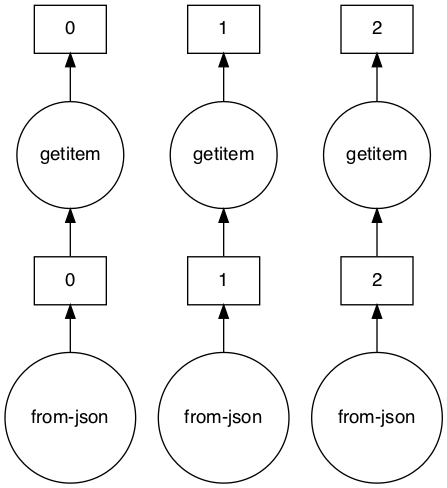

In [6]:
daa["analysis", ["x1", "y2"], 1:3:2].visualize()

In [7]:
daa = dakd.load_array()

In [9]:
daa

In [11]:
daa[0].compute()

<Array [[3, 2], [1], [5, 4], [6]] type='4 * var * int64'>

In [12]:
??daa.__getitem__

Signature: daa.__getitem__(key: 'Any') -> 'Array'
Docstring: <no docstring>
Source:   
    def __getitem__(self, key: Any) -> Array:
        if not isinstance(key, tuple):
            key = (key,)
        if isinstance(key[0], list):
            if any(isinstance(k, int) for k in key[0]):
                raise NotImplementedError("Lists containing integers not supported.")
        if (
            isinstance(key[0], (str, list))
            or key[0] is Ellipsis
            or key[0] == slice(None, None, None)
        ):
            return self._getitem_inner(key=key)
        if isinstance(key[0], slice):
            pass
        if isinstance(key[0], int) and len(key) == 1:
            return self._getitem_singleint(key=key[0])
        if isinstance(key[0], int) and len(key) > 1:
            pass
        return key
File:      ~/software/repos/dask-awkward/src/dask_awkward/core.py
Type:      method


In [13]:
??daa._compute_divisions

Signature: daa._compute_divisions() -> 'None'
Docstring: <no docstring>
Source:   
    def _compute_divisions(self) -> None:
        self._divisions = calculate_known_divisions(self)
File:      ~/software/repos/dask-awkward/src/dask_awkward/core.py
Type:      method
